In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [9]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[...,np.newaxis].astype(np.float32)

In [11]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, n_steps], series[9000:, -1]

In [17]:
y_pred = x_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 0s 409us/step - loss: 0.1415
Epoch 2/20
219/219 [==============================] - 0s 414us/step - loss: 0.0362
Epoch 3/20
219/219 [==============================] - 0s 416us/step - loss: 0.0187
Epoch 4/20
219/219 [==============================] - 0s 412us/step - loss: 0.0124
Epoch 5/20
219/219 [==============================] - 0s 412us/step - loss: 0.0103
Epoch 6/20
219/219 [==============================] - 0s 455us/step - loss: 0.0089
Epoch 7/20
219/219 [==============================] - 0s 628us/step - loss: 0.0078
Epoch 8/20
219/219 [==============================] - 0s 428us/step - loss: 0.0069
Epoch 9/20
219/219 [==============================] - 0s 481us/step - loss: 0.0064
Epoch 10/20
219/219 [==============================] - 0s 430us/step - loss: 0.0060
Epoch 11/20
219/219 [==============================] - 0s 421us/step - loss: 0.0055
Epoch 12/20
219/219 [==============================] - 0s 412us/step - loss: 0.0052
E

In [19]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 486us/step - loss: 0.0039


0.003887005615979433

In [20]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2649
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1216
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0733
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0592
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0506
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0431
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0385
Epoch 8/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0350
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0308
Epoch 10/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0288
Epoch 11/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0259
Epoch 12/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0238
Epoch 13/20
219/219 [====

In [23]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 1ms/step - loss: 0.0140


0.013981986790895462

In [24]:
keras.backend.clear_session()

In [32]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 20)          440       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 4s 10ms/step - loss: 0.1098
Epoch 2/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0078
Epoch 3/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0058
Epoch 4/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0052
Epoch 5/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0045
Epoch 6/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0040
Epoch 7/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0039
Epoch 8/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0035
Epoch 9/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0035
Epoch 10/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0036
Epoch 11/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0034
Epoch 12/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0032
Epoch 13/20
2

In [27]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 3ms/step - loss: 0.0029


0.002926837420091033

In [34]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0334
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0050
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0034
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0033
Epoch 5/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0030
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0030
Epoch 7/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0030
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0029
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0028
Epoch 10/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0029
Epoch 11/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0028
Epoch 12/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0029
Epoch 13/20
219/219 [====

In [37]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0030


0.0029832404106855392

In [39]:
series = generate_time_series(1, n_steps + 10)
series.shape

(1, 60, 1)

In [45]:
x_new, y_new = series[:, :n_steps], series[:, n_steps:]
model.predict(x_new).shape

(1, 1)

In [46]:
x_new, y_new = series[:, :n_steps], series[:, n_steps:]
x = x_new
for step_ahead in range(10):
    y_pred_one = model.predict(x[:, step_ahead:])[:, np.newaxis, :]
    x = np.concatenate([x, y_pred_one], axis=1)
y_pred = x[:, n_steps:]

In [47]:
y_pred.shape

(1, 10, 1)

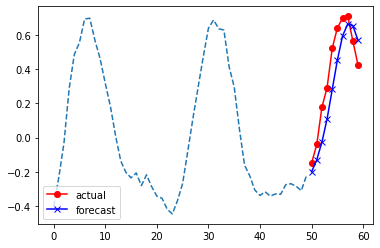

In [51]:
plt.plot(np.arange(50), x_new[0], "--")
plt.plot(np.arange(50, 60), y_new[0], "ro-", label="actual")
plt.plot(np.arange(50, 60), y_pred[0], "bx-", label='forecast')
plt.legend()
plt.show()

In [52]:
series = generate_time_series(10000, n_steps + 10)

In [53]:
series.shape

(10000, 60, 1)

In [54]:
x_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [55]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [63]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 3s 8ms/step - loss: 0.1241
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0254
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0181
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0154
Epoch 5/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0137
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0124
Epoch 7/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0118
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0116
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0109
Epoch 10/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0103
Epoch 11/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0102
Epoch 12/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0100
Epoch 13/20
219/219 [====

In [64]:
y_pred = model.predict(x_new)

In [65]:
y_pred = y_pred[..., np.newaxis]
y_pred.shape

(1, 10, 1)

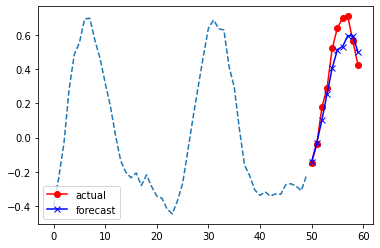

In [66]:
plt.plot(np.arange(50), x_new[0], "--")
plt.plot(np.arange(50, 60), y_new[0], "ro-", label="actual")
plt.plot(np.arange(50, 60), y_pred[0], "bx-", label='forecast')
plt.legend()
plt.show()

In [67]:
y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
y_train = y[:7000]
y_valid = y[7000:9000]
y_test = y[9000:]

In [68]:
keras.backend.clear_session()

In [69]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
time_distributed (TimeDistri (None, None, 10)          210       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [77]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=[last_time_step_mse])

In [78]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 10ms/step - loss: 0.0696 - last_time_step_mse: 0.0604 - val_loss: 0.0406 - val_last_time_step_mse: 0.0290
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0359 - last_time_step_mse: 0.0239 - val_loss: 0.0316 - val_last_time_step_mse: 0.0215
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0304 - last_time_step_mse: 0.0177 - val_loss: 0.0278 - val_last_time_step_mse: 0.0147
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0282 - last_time_step_mse: 0.0148 - val_loss: 0.0268 - val_last_time_step_mse: 0.0143
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0251 - last_time_step_mse: 0.0121 - val_loss: 0.0249 - val_last_time_step_mse: 0.0126
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0243 - last_time_step_mse: 0.0118 - val_loss: 0.0211 - val_last_time_step_mse: 0.0079
Epoch 7/20
219/219 [=======

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation='tanh', **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [3]:
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True, 
                    input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [4]:
keras.backend.clear_session()

In [5]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [6]:
model = keras.models.Sequential([
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True, 
                     input_shape=[None, 1]),
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[...,np.newaxis].astype(np.float32)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)

x_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
y_train = y[:7000]
y_valid = y[7000:9000]
y_test = y[9000:]

In [15]:
x_train.shape

(7000, 50, 1)

In [5]:
model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [6]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=[last_time_step_mse])

In [7]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 7s 22ms/step - loss: 0.0626 - last_time_step_mse: 0.0541 - val_loss: 0.0340 - val_last_time_step_mse: 0.0217
Epoch 2/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0308 - last_time_step_mse: 0.0179 - val_loss: 0.0247 - val_last_time_step_mse: 0.0114
Epoch 3/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0231 - last_time_step_mse: 0.0091 - val_loss: 0.0196 - val_last_time_step_mse: 0.0067
Epoch 4/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0192 - last_time_step_mse: 0.0061 - val_loss: 0.0183 - val_last_time_step_mse: 0.0063
Epoch 5/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0176 - last_time_step_mse: 0.0055 - val_loss: 0.0169 - val_last_time_step_mse: 0.0049
Epoch 6/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0168 - last_time_step_mse: 0.0050 - val_loss: 0.0169 - val_last_time_step_mse: 0.0051
Epoch 7/20
219/219 [==

In [9]:
history.history.keys()

dict_keys(['loss', 'last_time_step_mse', 'val_loss', 'val_last_time_step_mse'])

In [10]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.0140 - last_time_step_mse: 0.0034


[0.014039264991879463, 0.0033989588264375925]

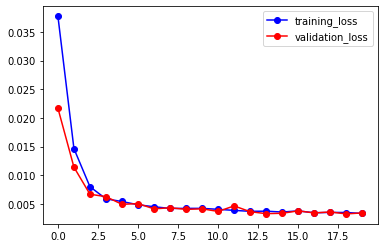

In [13]:
plt.plot(history.history['last_time_step_mse'], "b-o", label='training_loss')
plt.plot(history.history['val_last_time_step_mse'], "r-o", label='validation_loss')
plt.legend()
plt.show()

In [23]:
keras.backend.clear_session()

In [24]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding='valid',
                       input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 20)          100       
_________________________________________________________________
gru (GRU)                    (None, None, 20)          2520      
_________________________________________________________________
gru_1 (GRU)                  (None, None, 20)          2520      
_________________________________________________________________
time_distributed (TimeDistri (None, None, 10)          210       
Total params: 5,350
Trainable params: 5,350
Non-trainable params: 0
_________________________________________________________________


In [26]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=[last_time_step_mse])

In [27]:
history = model.fit(x_train, y_train[:, 3::2], epochs=20, validation_data=(x_valid, y_valid[:, 3::2]))

Epoch 1/20
219/219 [==============================] - 5s 13ms/step - loss: 0.0576 - last_time_step_mse: 0.0514 - val_loss: 0.0240 - val_last_time_step_mse: 0.0148
Epoch 2/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0228 - last_time_step_mse: 0.0121 - val_loss: 0.0173 - val_last_time_step_mse: 0.0068
Epoch 3/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0170 - last_time_step_mse: 0.0062 - val_loss: 0.0148 - val_last_time_step_mse: 0.0050
Epoch 4/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0150 - last_time_step_mse: 0.0053 - val_loss: 0.0137 - val_last_time_step_mse: 0.0041
Epoch 5/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0140 - last_time_step_mse: 0.0046 - val_loss: 0.0138 - val_last_time_step_mse: 0.0049
Epoch 6/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0134 - last_time_step_mse: 0.0046 - val_loss: 0.0130 - val_last_time_step_mse: 0.0044
Epoch 7/20
219/219 [==

In [28]:
model.evaluate(x_test, y_test[:, 3::2])

32/32 [==============================] - 0s 2ms/step - loss: 0.0114 - last_time_step_mse: 0.0042


[0.011416233144700527, 0.004248199053108692]

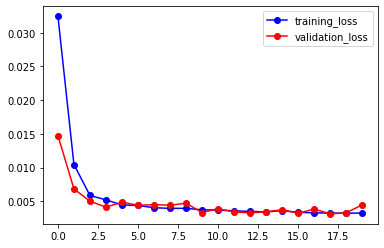

In [29]:
plt.plot(history.history['last_time_step_mse'], "b-o", label='training_loss')
plt.plot(history.history['val_last_time_step_mse'], "r-o", label='validation_loss')
plt.legend()
plt.show()

In [30]:
keras.backend.clear_session()

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding='causal',
                                 activation='relu', dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=10, kernel_size=1))
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=[last_time_step_mse])

In [32]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 6ms/step - loss: 0.0700 - last_time_step_mse: 0.0611 - val_loss: 0.0275 - val_last_time_step_mse: 0.0161
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0269 - last_time_step_mse: 0.0155 - val_loss: 0.0249 - val_last_time_step_mse: 0.0139
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0243 - last_time_step_mse: 0.0131 - val_loss: 0.0221 - val_last_time_step_mse: 0.0108
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0226 - last_time_step_mse: 0.0113 - val_loss: 0.0209 - val_last_time_step_mse: 0.0097
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0214 - last_time_step_mse: 0.0103 - val_loss: 0.0202 - val_last_time_step_mse: 0.0087
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0197 - last_time_step_mse: 0.0084 - val_loss: 0.0189 - val_last_time_step_mse: 0.0076
Epoch 7/20
219/219 [========

In [33]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0160 - last_time_step_mse: 0.0051


[0.016047779470682144, 0.005101033020764589]

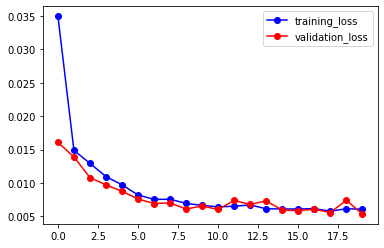

In [34]:
plt.plot(history.history['last_time_step_mse'], "b-o", label='training_loss')
plt.plot(history.history['val_last_time_step_mse'], "r-o", label='validation_loss')
plt.legend()
plt.show()

# 연습문제 9번 SketchRNN 데이터셋으로 분류모델

In [35]:
DOWNLOAD_ROOT = "http://download.tensorflow.org/data/"
FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME,
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/quickdraw",
                                extract=True)

1065304064/1065301781 [==============================] - 108s 0us/step


In [37]:
from pathlib import Path

In [39]:
filepath

'C:\\Users\\sinjy\\.keras\\datasets/quickdraw\\quickdraw_tutorial_dataset_v1.tar.gz'

In [38]:
quickdraw_dir = Path(filepath).parent
quickdraw_dir

WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw')

In [42]:
list(quickdraw_dir.glob("*"))

[WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00000-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00001-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00002-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00003-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00004-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00005-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00006-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00007-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00008-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord-00009-of-00010'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quickdraw/eval.tfrecord.classes'),
 WindowsPath('C:/Users/sinjy/.keras/datasets/quick

In [43]:
train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
eval_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [44]:
train_files

['C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00000-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00001-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00002-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00003-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00004-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00005-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00006-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00007-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00008-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\training.tfrecord-00009-of-00010']

In [45]:
eval_files

['C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00000-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00001-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00002-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00003-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00004-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00005-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00006-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00007-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00008-of-00010',
 'C:\\Users\\sinjy\\.keras\\datasets\\quickdraw\\eval.tfrecord-00009-of-00010']

In [47]:
with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
    test_classes = test_classes_file.readlines()

with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
    train_classes = train_classes_file.readlines()

In [50]:
len(train_classes)

345

In [51]:
train_classes == test_classes

True

In [54]:
train_classes

['garden hose\n',
 'lighter\n',
 'penguin\n',
 'tractor\n',
 'sheep\n',
 'skateboard\n',
 'mountain\n',
 'mouse\n',
 'chandelier\n',
 'guitar\n',
 'roller coaster\n',
 'owl\n',
 'toilet\n',
 'map\n',
 'snail\n',
 'yoga\n',
 'spoon\n',
 'camera\n',
 'telephone\n',
 'bench\n',
 'pig\n',
 'lion\n',
 'skull\n',
 'hand\n',
 'raccoon\n',
 'beard\n',
 'church\n',
 'animal migration\n',
 'whale\n',
 'sun\n',
 'washing machine\n',
 'airplane\n',
 'megaphone\n',
 'sleeping bag\n',
 'jail\n',
 'fire hydrant\n',
 'car\n',
 'barn\n',
 'swing set\n',
 'rake\n',
 'paintbrush\n',
 'van\n',
 'dragon\n',
 'sailboat\n',
 'compass\n',
 'duck\n',
 'hat\n',
 'kangaroo\n',
 'donut\n',
 'crocodile\n',
 'coffee cup\n',
 'cooler\n',
 'waterslide\n',
 'feather\n',
 'firetruck\n',
 'stereo\n',
 'leg\n',
 'tree\n',
 'pillow\n',
 'purse\n',
 'hourglass\n',
 'ear\n',
 'broccoli\n',
 'goatee\n',
 'moon\n',
 'bridge\n',
 'peas\n',
 'squiggle\n',
 'foot\n',
 'camouflage\n',
 'string bean\n',
 'pants\n',
 'lipstick\n',


In [55]:
class_names = [name.strip().lower() for name in train_classes]

In [91]:
class_names

['garden hose',
 'lighter',
 'penguin',
 'tractor',
 'sheep',
 'skateboard',
 'mountain',
 'mouse',
 'chandelier',
 'guitar',
 'roller coaster',
 'owl',
 'toilet',
 'map',
 'snail',
 'yoga',
 'spoon',
 'camera',
 'telephone',
 'bench',
 'pig',
 'lion',
 'skull',
 'hand',
 'raccoon',
 'beard',
 'church',
 'animal migration',
 'whale',
 'sun',
 'washing machine',
 'airplane',
 'megaphone',
 'sleeping bag',
 'jail',
 'fire hydrant',
 'car',
 'barn',
 'swing set',
 'rake',
 'paintbrush',
 'van',
 'dragon',
 'sailboat',
 'compass',
 'duck',
 'hat',
 'kangaroo',
 'donut',
 'crocodile',
 'coffee cup',
 'cooler',
 'waterslide',
 'feather',
 'firetruck',
 'stereo',
 'leg',
 'tree',
 'pillow',
 'purse',
 'hourglass',
 'ear',
 'broccoli',
 'goatee',
 'moon',
 'bridge',
 'peas',
 'squiggle',
 'foot',
 'camouflage',
 'string bean',
 'pants',
 'lipstick',
 'jacket',
 'hockey puck',
 'truck',
 'table',
 'hammer',
 'the great wall of china',
 'paint can',
 'fireplace',
 'leaf',
 'apple',
 'beach',
 'w

In [60]:
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    flat_sketches = tf.sparse.to_dense(examples['ink'])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lengths = examples['shape'][:, 0]
    labels = examples['class_index'][:, 0]
    return sketches, lengths, labels

In [61]:
def quickdraw_dataset(filepaths, batch_size=32, shuffle_buffer_size=None,
                     n_parse_threads=5, n_read_threads=5, cache=False):
    dataset = tf.data.TFRecordDataset(filepaths, 
                                      num_parallel_reads=n_read_threads)
    
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(parse, num_parallel_calls=n_parse_threads)
    return dataset.prefetch(1)

In [62]:
train_set = quickdraw_dataset(train_files, shuffle_buffer_size=10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [66]:
sketch, length, label = None, None, None
for sketches, lengths, labels in train_set.take(1):
    sketch = sketches[0]
    length = lengths[0]
    label = labels[0]

In [68]:
sketch

<tf.Tensor: shape=(174, 3), dtype=float32, numpy=
array([[-0.01724139,  0.00784314,  0.        ],
       [ 0.        ,  0.02745098,  0.        ],
       [ 0.03017242,  0.17254902,  0.        ],
       [ 0.00862069,  0.2901961 ,  0.        ],
       [-0.0474138 ,  0.12941176,  0.        ],
       [-0.06896552,  0.07843137,  1.        ],
       [ 0.19827586, -0.5960784 ,  0.        ],
       [ 0.00431034,  0.654902  ,  1.        ],
       [-0.14224137, -0.572549  ,  0.        ],
       [-0.03448276,  0.03921568,  0.        ],
       [-0.0775862 , -0.01568627,  0.        ],
       [-0.04310345, -0.05098039,  0.        ],
       [-0.00862069, -0.09411764,  0.        ],
       [ 0.05603448, -0.06274511,  0.        ],
       [ 0.05172414, -0.03529412,  0.        ],
       [ 0.06034482, -0.01176471,  0.        ],
       [ 0.00431035,  0.03921568,  0.        ],
       [-0.05172414,  0.01960784,  0.        ],
       [-0.03448275, -0.00784314,  0.        ],
       [ 0.00431034, -0.03921568,  0. 

In [84]:
origin = np.zeros((3), dtype='float32')[np.newaxis, :]
sketch_ = np.r_[origin, sketch]
stroke_end_indices = np.argwhere(sketch_[:, -1] == 1.)[:, 0]
coordinates = np.cumsum(sketch[:, :2], axis=0)
strokes = np.split(coordinates, stroke_end_indices + 1)

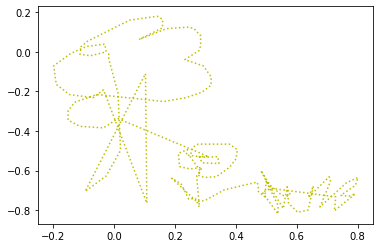

In [93]:
plt.plot(coordinates[:, 0], - coordinates[:, 1], "y:")
# for stroke in strokes:
#     plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
plt.show()

In [92]:
class_names[label.numpy()]

'garden'